In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
import pandas as pd

In [2]:
# open output file and read each line
rtt_file = open('rtt.txt', 'r')
lines = rtt_file.readlines()

# create list of used values
values = list(range(20, 1480, 20))

# define measures lists
avg = []
max = []
min = []
std = []

# parse data from each line
for l in lines:
    if(l[0:3] == 'rtt'):
        measures = l.split("=")[1]
        min.append(float(measures.split("/")[0].strip()))
        avg.append(float(measures.split("/")[1]))
        max.append(float(measures.split("/")[2]))
        std.append(float(measures.split("/")[3].split()[0]))

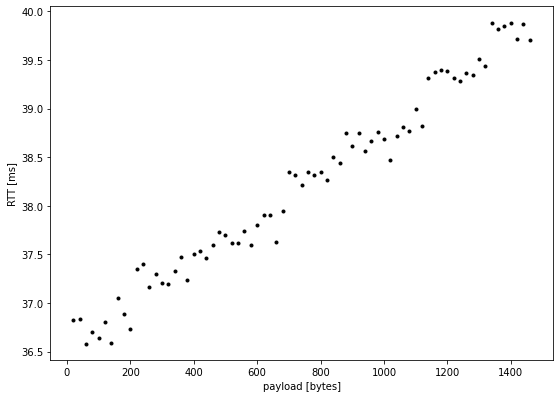

In [3]:
plt.scatter(values, min, color='black', marker=".")
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/min.png')
plt.show()

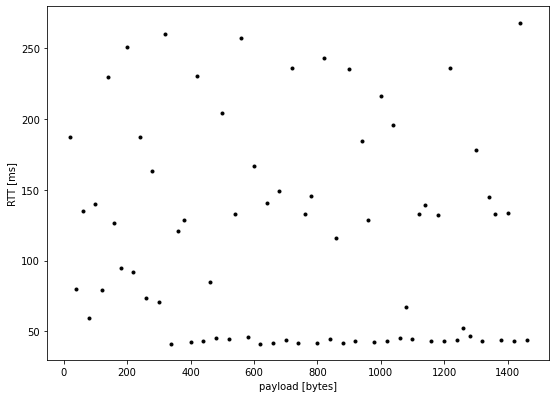

In [4]:
plt.scatter(values, max, color='black', marker=".")
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/max.png')
plt.show()

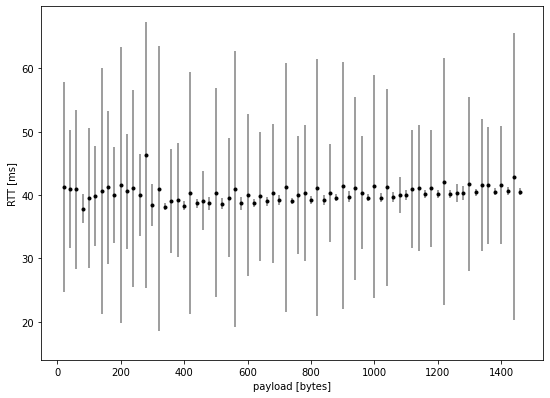

In [5]:
plt.errorbar(values, avg, yerr=std, fmt='.k', ecolor='grey')
plt.gca().set_ylim(bottom=0)
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
plt.ylim(bottom=14)
fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/avg.png')
plt.show()

linear regression on RTT vs payload curve

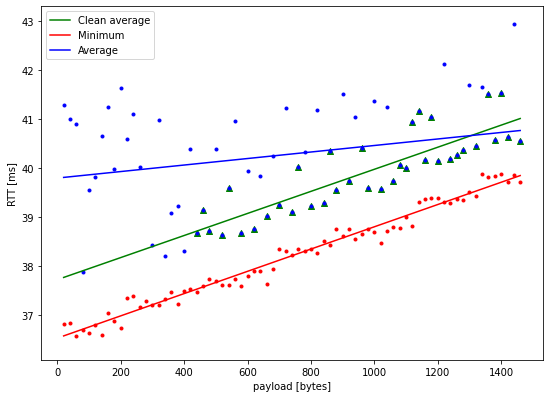

In [6]:
aavg = np.array(avg[20:])
aval = np.array(values[20:])
clean_avg = aavg[np.array(std[20:])<10]
clean_val = aval[np.array(std[20:])<10]

minfit = np.array(np.polyfit(values,min,1))
avgfit = np.array(np.polyfit(values,avg,1))
cfit = np.array(np.polyfit(clean_val,clean_avg,1))

plt.plot(values, cfit[0]*np.array(values)+cfit[1], color='green', label="Clean average")
plt.scatter(clean_val, clean_avg, color='green', marker="^")

plt.plot(values, minfit[0]*np.array(values)+minfit[1], color='red', label="Minimum")
plt.scatter(values, min, color='red', marker=".")

plt.plot(values, avgfit[0]*np.array(values)+avgfit[1], color='blue', label="Average")
plt.scatter(values, avg, color='blue', marker=".")

plt.legend(loc="best")
plt.xlabel("payload [bytes]")
plt.ylabel("RTT [ms]")
plt.ylim(top=43.3)

fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/clean.png')
plt.show()

In [7]:
aavg = np.array(avg[20:])/1000
aval = np.array(values[20:])*8 + 28*8
mmin = np.array(min)/1000
mvalues = np.array(values)*8 + (28*8)
clean_avg = aavg[np.array(std[20:])<10]
clean_val = aval[np.array(std[20:])<10]

minfit = np.array(np.polyfit(mvalues,mmin,1))
cfit = np.array(np.polyfit(clean_val,clean_avg,1))
avfit = np.array(np.polyfit(mvalues, np.array(avg)/1000, 1))
print("bps")
print(2/minfit[0])
print(2/cfit[0])
print(2/avfit[0])
print("Mbps")
print(2/minfit[0]/(1024*1024))
print(2/cfit[0]/(1024*1024))
print(2/avfit[0]/(1024*1024))

bps
7041265.220555522
7103553.432332049
24067776.94497948
Mbps
6.71507379584839
6.774476463634538
22.95282072542141


iperf bitrate mean

In [8]:
df = pd.read_csv (r'iperf.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
meas = np.array(df['bitrate'])

print("mean")
print(np.mean(meas))
print(np.mean(meas)/(1024*1024))
print("max")
print(np.max(meas))
print(np.max(meas)/(1024*1024))

mean
6035022.95
5.7554463863372805
max
7396970
7.054300308227539


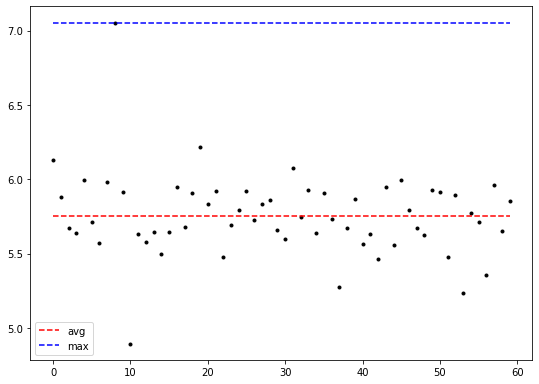

In [9]:
plt.scatter(range(len(meas)), meas/(1024*1024), color='black', marker=".")
plt.plot(range(len(meas)), [np.mean(meas)/(1024*1024)]*len(meas), color="red", linestyle="--", label="avg")
plt.plot(range(len(meas)), [np.max(meas)/(1024*1024)]*len(meas), color="blue", linestyle="--", label="max")


plt.legend(loc="best")

fig = plt.gcf()
fig.set_size_inches(9, 6.5)
fig.savefig('../img/iperf.png')
plt.show()